In [1]:
import pandas as pd 
import numpy as np
import random

In [2]:
classes=['irregular','circle','rectangle']

In [3]:
random.choice(classes)

'circle'

In [4]:
height=[]
width=[]
shape=[]
output=[]
classes=["irregular","circle","rectangle"]
for c in classes:
    for i in range(1,11):
        for j in range(1,11):
            height.append(i)
            width.append(j)
            shape.append(c)
            if i <= 2 or j <= 2 and c=="rectangle":
                output.append(2)
            elif i <= 5 or j <= 5 and c=="rectangle":
                output.append(3)
            elif i <= 7 or j <= 7 and c=="rectangle":
                output.append(4)
            elif i <= 5 or j <= 5 and c=="circle":
                output.append(3)
            elif i <= 7 or j <= 7 and c=="circle":
                output.append(4)
            elif i <= 5 or j <= 5 and c=="irregular":
                output.append(3)
            elif i <= 7 or j <= 7 and c=="irregular":
                output.append(4)
            else:
                output.append(5)


In [5]:
len(height)

300

In [6]:
len(width)

300

In [7]:
len(shape)

300

In [8]:
df = pd.DataFrame(list(zip(height, width, shape, output)),
               columns =['height', 'width', 'shape', 'output'])

In [9]:
df.head()

,height,width,shape,output
0,1,1,irregular,2
1,1,2,irregular,2
2,1,3,irregular,2
3,1,4,irregular,2
4,1,5,irregular,2


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['shape']=le.fit_transform(df['shape'])

In [11]:
df.head()

,height,width,shape,output
0,1,1,1,2
1,1,2,1,2
2,1,3,1,2
3,1,4,1,2
4,1,5,1,2


In [12]:
x = df.drop('output',axis=1)

In [13]:
y= df['output']

In [14]:
x

,height,width,shape
0,1,1,1
1,1,2,1
2,1,3,1
3,1,4,1
4,1,5,1
...,...,...,...
295,10,6,2
296,10,7,2
297,10,8,2
298,10,9,2


In [15]:
y

0      2
1      2
2      2
3      2
4      2
      ..
295    4
296    4
297    5
298    5
299    5
Name: output, Length: 300, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)   

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clf=RandomForestClassifier(n_estimators=100)

In [20]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
X_train

,height,width,shape
194,10,5,0
101,1,2,0
68,7,9,1
224,3,5,2
37,4,8,1
...,...,...,...
188,9,9,0
71,8,2,1
106,1,7,0
270,8,1,2


In [22]:
X_test

,height,width,shape
203,1,4,2
266,7,7,2
152,6,3,0
9,1,10,1
233,4,4,2
...,...,...,...
114,2,5,0
118,2,9,0
72,8,3,1
15,2,6,1


In [23]:
Pred = clf.predict(X_test)
print(Pred)

[2 4 4 2 3 3 4 2 2 4 3 4 2 3 3 2 5 2 3 4 5 2 3 2 2 3 2 4 4 3 2 4 3 3 2 2 2
 3 3 3 3 4 4 4 4 4 3 3 2 2 3 3 3 4 5 5 5 3 3 3 3 4 2 4 3 3 3 4 4 4 2 3 2 3
 3 3 3 3 4 5 4 4 2 3 5 2 2 3 2 2]


In [24]:
from sklearn.metrics import classification_report,confusion_matrix
rand_score=clf.score(X_test, y_test)
'''rand_score=classifier.accuracy_score(y_test,Pred)'''
print(classification_report(y_test,Pred))
print("Accuracy score:",rand_score)  

              precision    recall  f1-score   support

           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        35
           4       0.96      1.00      0.98        22
           5       1.00      0.88      0.93         8

    accuracy                           0.99        90
   macro avg       0.99      0.97      0.98        90
weighted avg       0.99      0.99      0.99        90

Accuracy score: 0.9888888888888889


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

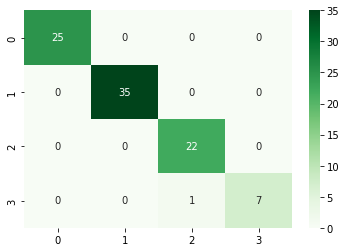

In [26]:
cm=confusion_matrix(y_test,Pred)
sns.heatmap(cm,annot=True,cmap="Greens")

In [34]:
import joblib 

# save model with joblib 
filename = 'finger_model.sav'
#joblib.dump(clf, filename)

['finger_model.sav']

In [28]:
model = joblib.load(filename)

In [29]:
model.predict(X_test)

array([2, 4, 4, 2, 3, 3, 4, 2, 2, 4, 3, 4, 2, 3, 3, 2, 5, 2, 3, 4, 5, 2,
       3, 2, 2, 3, 2, 4, 4, 3, 2, 4, 3, 3, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 3, 3, 2, 2, 3, 3, 3, 4, 5, 5, 5, 3, 3, 3, 3, 4, 2, 4, 3, 3,
       3, 4, 4, 4, 2, 3, 2, 3, 3, 3, 3, 3, 4, 5, 4, 4, 2, 3, 5, 2, 2, 3,
       2, 2], dtype=int64)

In [30]:
test=[4,4,2]
test_np=np.array([test])
test_np

array([[4, 4, 2]])

In [31]:
classes=['circle','irregular','rectangle']

In [32]:
pred = model.predict(test_np)
pred

c:\Users\vince\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3], dtype=int64)

In [33]:

print(pred)
print(classes[np.argmax(pred)])

[3]
circle


In [34]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# corrected test data with three features
test = [[3, 6, 1]]

# convert test data to numpy array
test_np = np.array(test)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# train the model
clf.fit(test_np, [1])

# predict the output
prediction = clf.predict(test_np)
print(prediction)

[1]
